# 필요한 library import

In [21]:
import pandas as pd
import numpy as np

#시각화 패키지
import matplotlib.pyplot as plt

#시각화를 할 때 한글 출력을 위해서 import 
import platform
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')

In [1]:
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\LGhv_practice\\ETL'

In [3]:
file_path = 'C:\\Users\\USER\\Documents\\LGhv_practice\\resource\\data\\data'

# data load

In [7]:
cctv = pd.read_excel(file_path+'/cctv.xlsx')
cctv.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [8]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [11]:
#pop.txt는 처음 두 개의 행은 의미가 없음
#한글 포함, 구분 기호는 탭, 천 단위 구분 기호가 존재 
pop = pd.read_csv(file_path +'/pop.txt', skiprows = 2, delimiter = '\t', thousands = ',')
pop.head()
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        26 non-null     object 
 1   자치구       26 non-null     object 
 2   세대        26 non-null     int64  
 3   계         26 non-null     int64  
 4   남자        26 non-null     int64  
 5   여자        26 non-null     int64  
 6   계.1       26 non-null     int64  
 7   남자.1      26 non-null     int64  
 8   여자.1      26 non-null     int64  
 9   계.2       26 non-null     int64  
 10  남자.2      26 non-null     int64  
 11  여자.2      26 non-null     int64  
 12  세대당인구     26 non-null     float64
 13  65세이상고령자  26 non-null     int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 3.0+ KB


# column 이름 변경

In [17]:
#column 이름 변경
cctv.rename(columns = {cctv.columns[0]:'구별'}, inplace = True)
pop.rename(columns = {pop.columns[1]: '구별'}, inplace = True)

#cctv의 구이름에는 중간에 공백이 존재하고 pop의 구 이름에는 공백이 없음
#cctv의 구 이름에서 공백 제거 
gu = []
for x in cctv['구별']:
    gu.append(x.replace(' ',''))
cctv['구별'] = gu

print(cctv.head())
print(pop.head())

    구별    소계  2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
0  강남구  5221    1944.0  195.0  316.0    430    546    765    577    448
1  강동구  1879     303.0  387.0  134.0     59    144    194    273    385
2  강북구  1265     243.0   88.0  141.0     74    145    254      1    319
3  강서구  1617     219.0  155.0  118.0    230    187    190    264    254
4  관악구  3985     430.0   56.0  419.0    487    609    619    694    671
         기간   구별       세대        계       남자       여자      계.1     남자.1  \
0  2021.2/4   합계  4405638  9795426  4756178  5039248  9565990  4649442   
1  2021.2/4  종로구    73525   155106    75009    80097   146029    70985   
2  2021.2/4   중구    62897   132259    64526    67733   123016    60019   
3  2021.2/4  용산구   111650   240665   116858   123807   226378   108948   
4  2021.2/4  성동구   134542   295767   143927   151840   289162   141042   

      여자.1     계.2    남자.2    여자.2  세대당인구  65세이상고령자  
0  4916548  229436  106736  122700   2.17   1576971  
1    75044    9

# 불필요한 열과 행 제거

In [23]:
#pop 데이터에서 기간, 구별, 계 , 남자, 여자 열만 필요
pop = pop[['기간','구별','계', '남자', '여자']]

#pop 데이터의 첫 번째 행은 전체 데이터의 집계라서 불필요
#pop.drop([0], inplace = True)

#새로운 열 추가 - 없는 열 이름에 데이터를 대입하면 됨
pop['여성 비율'] = pop['여자'] / pop['계'] * 100

# data 결합

In [25]:
df = pd.merge(cctv, pop, on = '구별')
df.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,기간,계,남자,여자,여성 비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,2021.2/4,536107,256449,279658,52.164587
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,2021.2/4,469094,230388,238706,50.886603
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,2021.2/4,306093,148824,157269,51.379483
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,2021.2/4,582995,280822,302173,51.831148
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,2021.2/4,502698,251713,250985,49.927591


# 불필요한 열 삭제

In [26]:
#2011년 이전 , 2012, 2013,2014, 2015, 2016, 2017년, 기간 열을 삭제
#del 이용 - pandas에서는 추천X
#del df['2011년 이전']
df.drop(['2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년', '2017년', '기간'], axis = 1, inplace = True)
df.head()

,구별,소계,2018년,계,남자,여자,여성 비율
0,강남구,5221,448,536107,256449,279658,52.164587
1,강동구,1879,385,469094,230388,238706,50.886603
2,강북구,1265,319,306093,148824,157269,51.379483
3,강서구,1617,254,582995,280822,302173,51.831148
4,관악구,3985,671,502698,251713,250985,49.927591


# index 재 설정

In [27]:
df.set_index('구별', inplace= True)
df.head()

,소계,2018년,계,남자,여자,여성 비율
구별,,,,,,
강남구,5221,448,536107,256449,279658,52.164587
강동구,1879,385,469094,230388,238706,50.886603
강북구,1265,319,306093,148824,157269,51.379483
강서구,1617,254,582995,280822,302173,51.831148
관악구,3985,671,502698,251713,250985,49.927591


# 한글 사용 설정

In [30]:
#matplotlib의 기본 폰트가 한글을 지원하지 않기 때문에 폰트를 재설정
#운영 체제 별로 폰트의 위치가 다르므로 조건문을 이용해서 설정
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)

# Pandas 활용 시각화

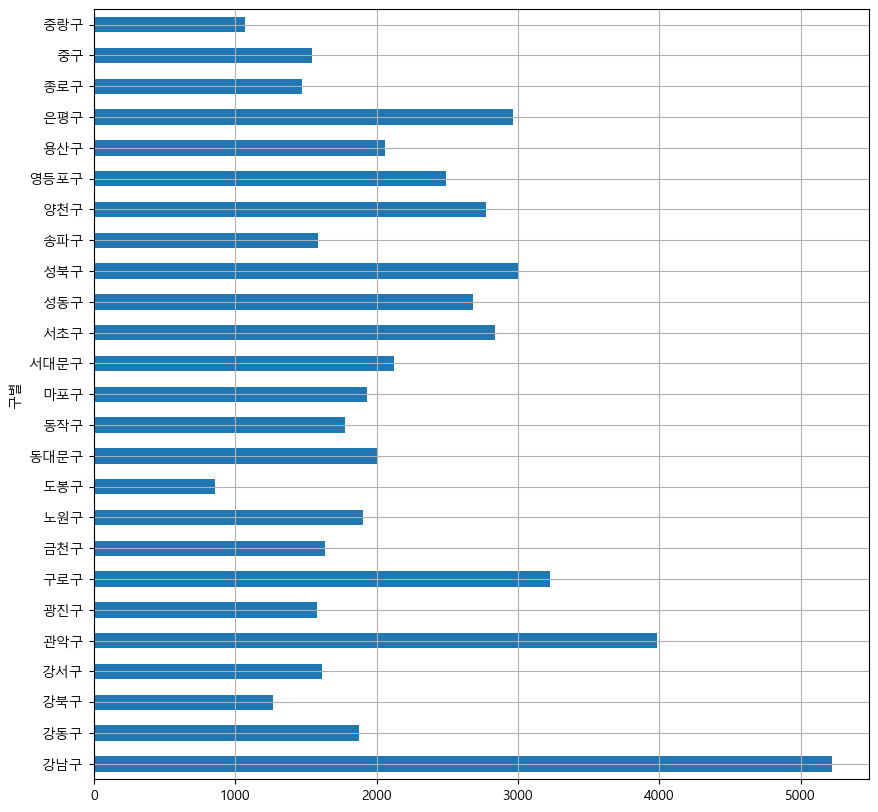

In [31]:
df['소계'].plot(kind= 'barh', grid = True, figsize = (10,10))
plt.show()

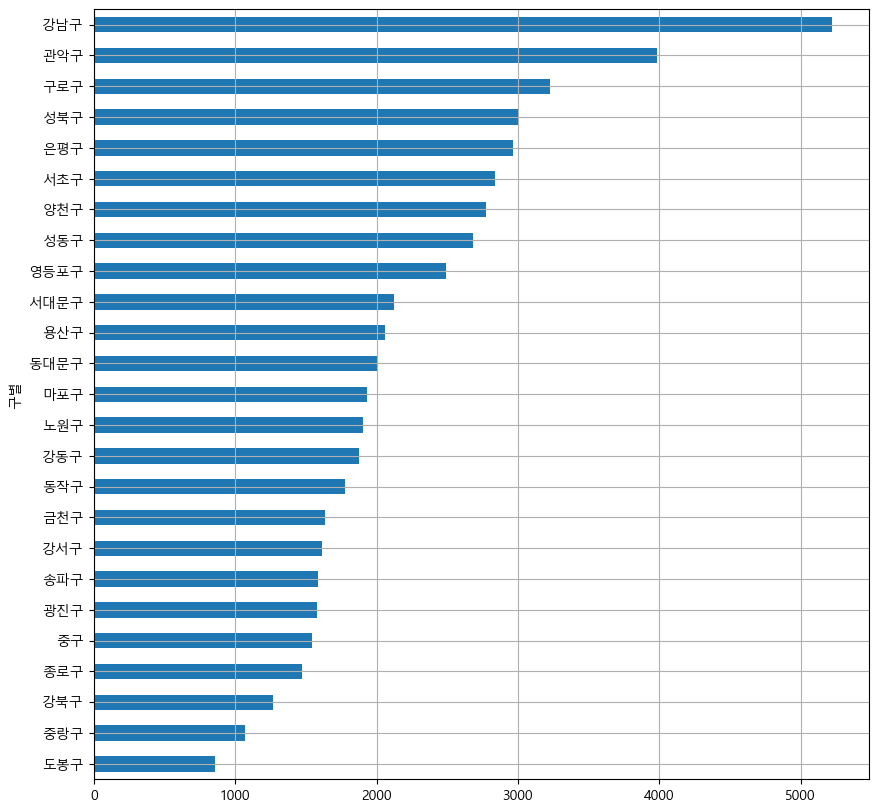

In [32]:
df['소계'].sort_values().plot(kind= 'barh', grid = True, figsize = (10,10))
plt.show()

# 인구 수 대비 CCTV 개수를 막대 그래프로 출력

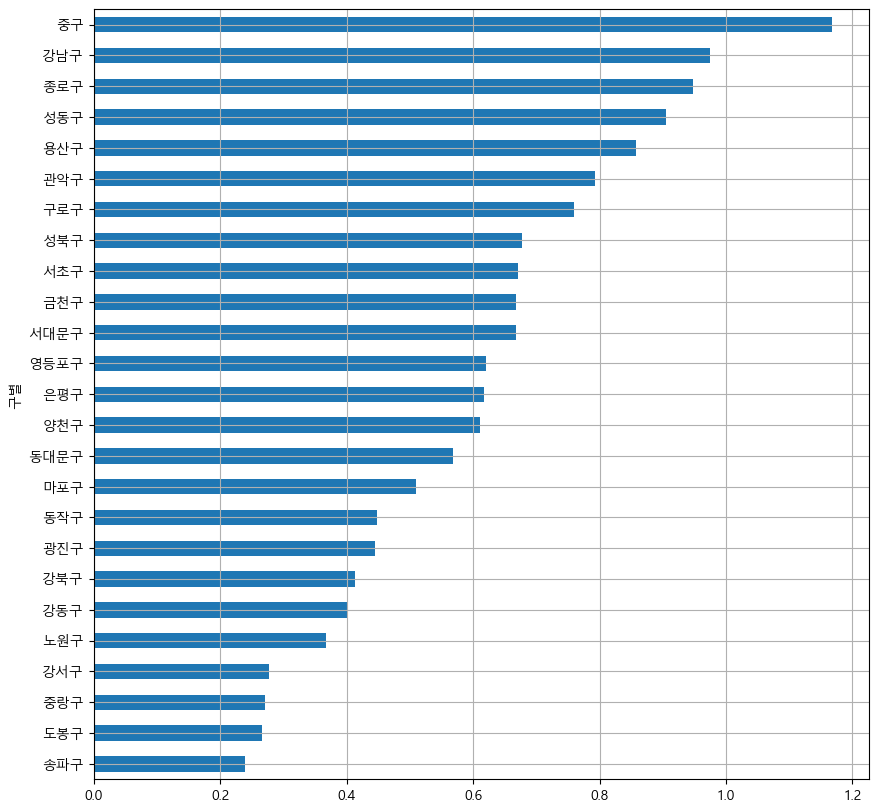

In [33]:
df['cctv비율'] = df['소계'] / df['계'] * 100
df['cctv비율'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10))
plt.show()

# 인구 수 와 CCTV 개수 사이 연관성 확인 - 산점도 (scatter)

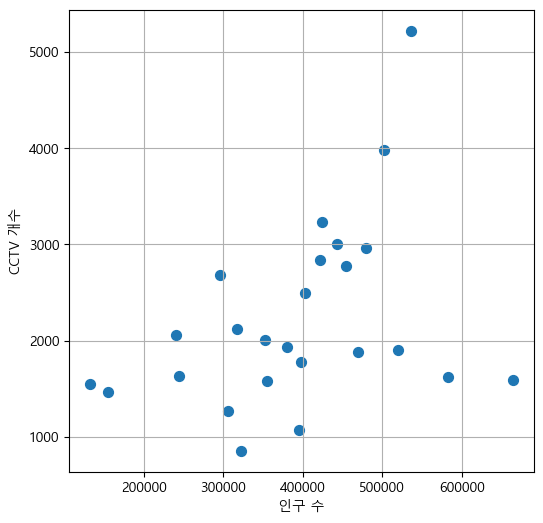

In [34]:
plt.figure(figsize = (6,6))
plt.scatter(df['계'], df['소계'], s = 50)
plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

# 추세선

 
0.002892 x + 1087


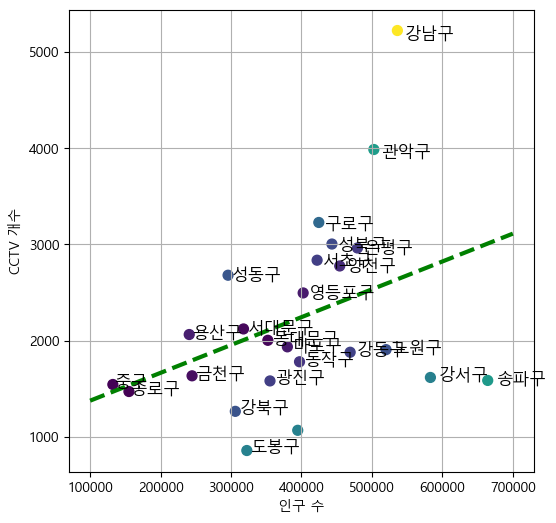

In [40]:
#2개 항목의 단항식을 구하기
fp1 = np.polyfit(df['계'], df['소계'], 1)
f1 = np.poly1d(fp1)
print(f1)

#산점도와 단항식을 같이 출력
fx = np.linspace(100000, 700000, 100)

df['오차'] = np.abs(df['소계'] - f1(df['계']))

plt.figure(figsize = (6,6))
plt.scatter(df['계'], df['소계'], c= df['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

#좌표를 지정해서 레이블을 출력
for n in range(24):
    plt.text(df['계'][n] * 1.02, df['소계'][n]*0.98, df.index[n], fontsize = 12)

plt.xlabel('인구 수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()
